In [1]:
import Pkg; Pkg.activate("../../"); Pkg.test()

 Activating environment at `/mnt/geda00/nemec/BachelorThesis/Project.toml`
    Testing MaGeSigGen
Status `/tmp/jl_xJnD4f/Project.toml`
  [6e4b80f9] BenchmarkTools v0.5.0
  [717857b8] DSP v0.6.8
  [31c24e10] Distributions v0.23.12
  [7073ff75] IJulia v1.21.4
  [a98d9a8b] Interpolations v0.12.10
  [4138dd39] JLD v0.10.0
  [d3f1610b] MJDSigGen v0.1.0 `https://github.com/Luapulu/MJDSigGen.jl.git#dev-luapulu`
  [a1237f97] MaGe v0.2.0 `https://github.com/Luapulu/MaGe.jl.git#master`
  [c72a0c40] MaGeSigGen v0.1.3 `/mnt/geda00/nemec/BachelorThesis`
  [91a5bcdd] Plots v1.6.7
  [2913bbd2] StatsBase v0.33.1
  [ddb6d928] YAML v0.4.2
  [8ba89e20] Distributed
  [56ddb016] Logging
  [10745b16] Statistics
  [8dfed614] Test
Status `/tmp/jl_xJnD4f/Manifest.toml`
  [621f4979] AbstractFFTs v0.5.0
  [79e6a3ab] Adapt v2.3.0
  [13072b0f] AxisAlgorithms v1.0.0
  [6e4b80f9] BenchmarkTools v0.5.0
  [9e28174c] BinDeps v1.0.1
  [a74b3585] Blosc v0.7.0
  [0b7ba130] Blosc_jll v1.14.3+1
  [6e34b625] Bzip2_jll v1.0.6

Test Summary:  | Pass  Total
Detector Setup |    8      8


[ Info: Worker 1 got 2 events and generated 2 signals
[ Info: Worker 1 got 2 events and generated 0 signals
[ Info: Worker 1 got 1 events and generated 0 signals
[ Info: Worker 1 got 1 events and generated 1 signals


Test Summary: | Pass  Total
Signals       |   31     31

Reading values from config file /mnt/geda00/nemec/BachelorThesis/test/GWD6022_01ns.config
Setup of signal calculation done


    Testing MaGeSigGen tests passed 


In [9]:
using StatsBase, Statistics, Distributions, StatsPlots, LinearAlgebra, Plots
using MaGeSigGen, MaGe, DelimitedFiles, Interpolations, DSP

In [5]:
dir = realpath(joinpath(dirname(pathof(MaGeSigGen)), "..", "runs", "09-23-siggen2"))

event_dir = "/mnt/e15/comellato/results4Paul/GWD6022_Co56_side50cm/DM"
event_paths = filter(p -> occursin(r".root.hits$", p), readdir(event_dir, join=true))
signal_paths = map(
    p -> joinpath(dir, "signals", split(splitdir(p)[end], '.')[1] * "_signals.jld"),
    event_paths
)

2001-element Array{String,1}:
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0001_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0002_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0003_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0004_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0005_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0006_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0007_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0008_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0009_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen

In [6]:
events1 = MaGe.loadstreaming(first(event_paths))
sgnls1 = load_signals(SignalDict, first(signal_paths))

SignalDict(Dict{Int64,Array{Float32,1}}(418540 => [0.011257649, 0.036257505, 0.061195802, 0.08621328, 0.11106645, 0.13624921, 0.16112784, 0.18566187, 0.21045141, 0.23563801  …  1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607],878460 => [0.076448575, 0.2463514, 0.4164186, 0.5867544, 0.75678074, 0.9271127, 1.0976584, 1.2655581, 1.4291977, 1.5883017  …  2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866],51706 => [0.0934597, 0.3010261, 0.5084963, 0.71584684, 0.9231779, 1.1304561, 1.3378493, 1.5451604, 1.7523861, 1.9595032  …  1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114],11851 => [0.01183101, 0.038140938, 0.06461875, 0.0912024, 0.11764101, 0.14389822, 0.1703593, 0.19695656, 0.22335704, 0.24988621  …  1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799],

In [19]:
raw = vec(readdlm("/mnt/geda00/comellato/pss/unisexMacros/noiseArrayDEP100MHz.dat"))

# periodic boundary conditions
push!(raw, raw[1])

# un-normalize
raw .*= 1592.5

2108701-element Array{Float64,1}:
  0.7939399217937472
  1.7504940444369
  0.7939399217937472
 -2.0757224461357113
 -2.0757224461357113
 -1.1191683234925585
 -1.1191683234925585
 -1.1191683234925585
 -0.1626142008494056
 -1.1191683234925585
  0.7939399217937472
 -0.1626142008494056
 -2.0757224461357113
  ⋮
  1.6274991950173163
  0.672020215554864
 -0.28345876390758806
  1.6274991950173163
 -0.28345876390758806
  0.672020215554864
  1.6274991950173163
  0.672020215554864
  1.6274991950173163
 -1.2389377433700401
  1.6274991950173163
  0.7939399217937472

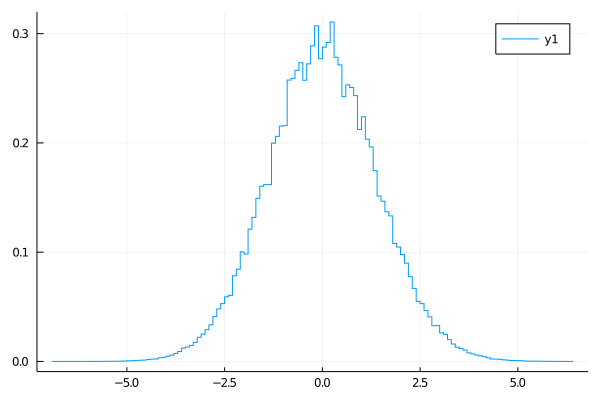

In [37]:
histraw = fit(Histogram, raw, nbins=200)
plot(normalize(histraw), seriestype=:step)

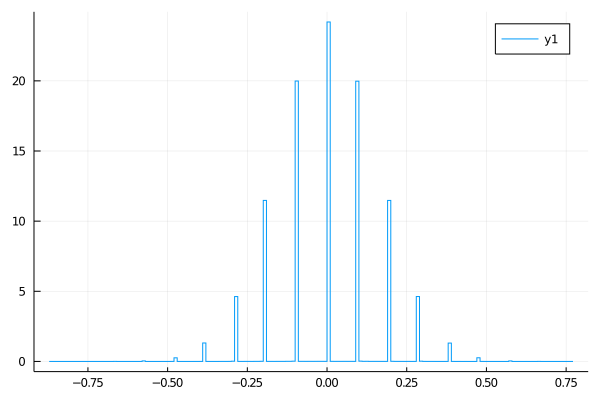

In [36]:
plot(normalize(fit(Histogram, diff(raw) ./ 10, nbins=200)), seriestype=:step)

In [22]:
println(mean(diff(raw)))
println(std(diff(raw)))
println(skewness(diff(raw)))
println(kurtosis(diff(raw)))

1.3573077998215268e-19
1.5856044425238993
0.0007365749148982707
0.03412197321573762


In [23]:
constitp = interpolate(raw, BSpline(Constant()))
cryo_noise_const = map(constitp, 1:0.1:length(raw) - 0.1)

21087000-element Array{Float64,1}:
 0.7939399217937472
 0.7939399217937472
 0.7939399217937472
 0.7939399217937472
 0.7939399217937472
 1.7504940444369
 1.7504940444369
 1.7504940444369
 1.7504940444369
 1.7504940444369
 1.7504940444369
 1.7504940444369
 1.7504940444369
 ⋮
 1.6274991950173163
 1.6274991950173163
 1.6274991950173163
 1.6274991950173163
 1.6274991950173163
 1.6274991950173163
 1.6274991950173163
 0.7939399217937472
 0.7939399217937472
 0.7939399217937472
 0.7939399217937472
 0.7939399217937472

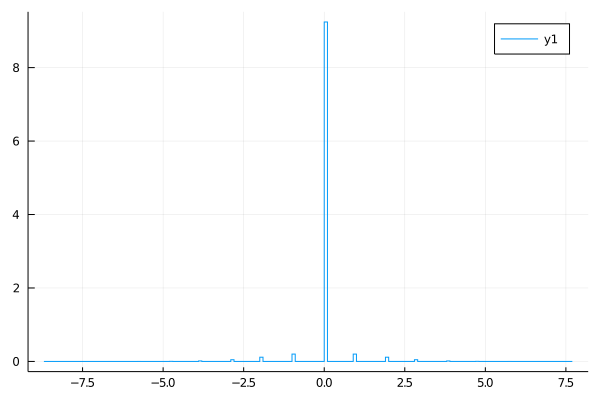

In [35]:
plot(normalize(fit(Histogram, diff(cryo_noise_const), nbins=200)), seriestype=:step)

In [25]:
linearitp = interpolate(raw, BSpline(Linear()))
cryo_noise_linear = map(linearitp, 1:0.1:length(raw) - 0.1)

21087000-element Array{Float64,1}:
 0.7939399217937472
 0.8895953340580625
 0.9852507463223776
 1.080906158586693
 1.1765615708510082
 1.2722169831153236
 1.367872395379639
 1.4635278076439544
 1.5591832199082694
 1.6548386321725845
 1.7504940444369
 1.6548386321725845
 1.5591832199082694
 ⋮
 1.0542118081407181
 1.340855500911623
 1.6274991950173163
 1.5441432676173283
 1.46078734021734
 1.377431412817352
 1.29407548580552
 1.2107195584055317
 1.1273636310055435
 1.0440077036055553
 0.9606517762055673
 0.8772958491937354

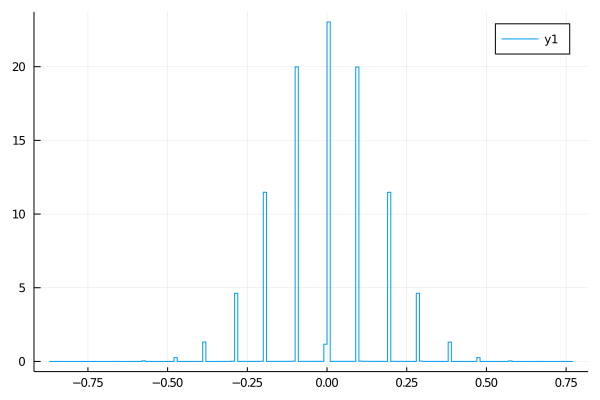

In [34]:
plot(normalize(fit(Histogram, diff(cryo_noise_linear), nbins=200)), seriestype=:step)

In [28]:
cryo_noise_smooth = moving_average(cryo_noise_const, 10, 4)

21087000-element Array{Float64,1}:
 1.4549188205401657
 1.4549188205401657
 1.4549188205401657
 1.4549188205401657
 1.4549188205401657
 1.449562117453364
 1.4391356775165534
 1.4219177033089765
 1.3960907419976112
 1.359741685337171
 1.310192181784256
 1.2459117447426358
 1.165561198440611
 ⋮
 0.9843505339091969
 1.0741841128073424
 1.1464796827647397
 1.2019406671118393
 1.242130420260608
 1.269472227704529
 1.2872493060186008
 1.2872493060186008
 1.2872493060186008
 1.2872493060186008
 1.2872493060186008
 1.2872493060186008

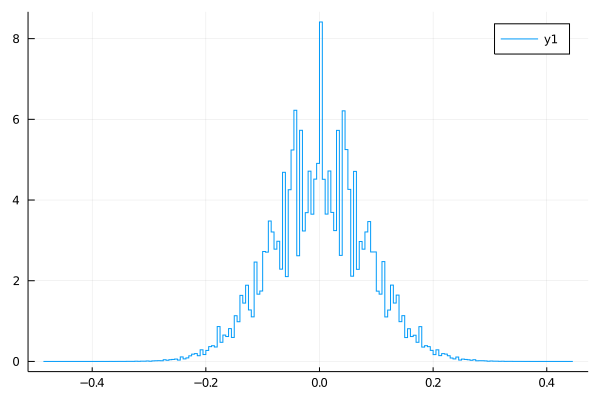

In [33]:
plot(normalize(fit(Histogram, diff(cryo_noise_smooth), nbins=200)), seriestype=:step)

In [30]:
quadraticitp = interpolate(raw, BSpline(Quadratic(Periodic(OnGrid()))))
cryo_noise_quadratic = map(quadraticitp, 1:0.1:length(raw) - 0.1)

21087000-element Array{Float64,1}:
 0.7939399217937472
 0.8754928045397223
 0.9702037543446352
 1.0780727712084863
 1.1990998551312748
 1.3332850061130017
 1.462584715254914
 1.5689554736582603
 1.6523972813230396
 1.7129101382492529
 1.7504940444369002
 1.7651489998859808
 1.7568750045964951
 ⋮
 1.1851985993607785
 1.441100193766748
 1.6274991950173165
 1.7443956017590256
 1.7917894139918755
 1.7696806317158662
 1.6780692555194199
 1.516955284549339
 1.3313424554421207
 1.1662345045694873
 1.0216314319314383
 0.8975332380581099

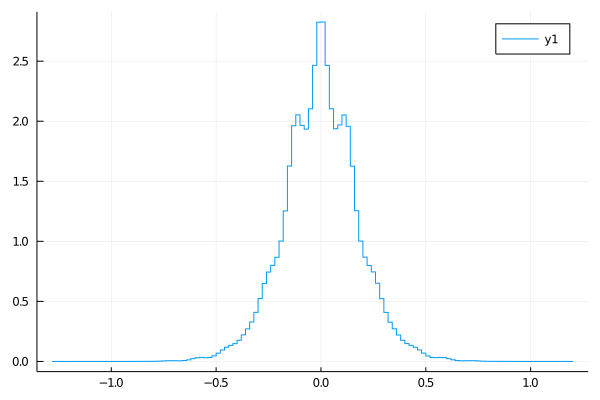

In [32]:
plot(normalize(fit(Histogram, diff(cryo_noise_quadratic), nbins=200)), seriestype=:step)

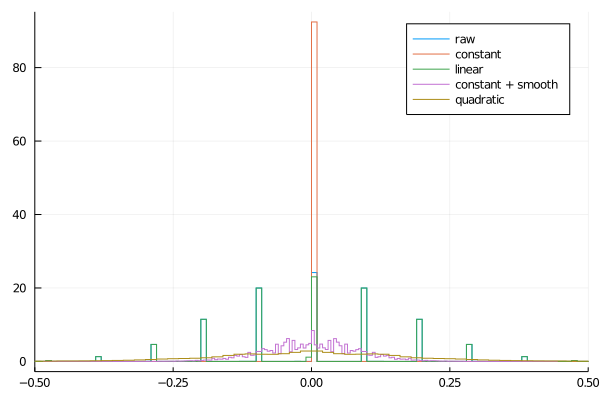

In [48]:
plot(xlims=(-0.5, 0.5))
plot!(normalize(fit(Histogram, diff(raw) ./ 10, nbins=200)), seriestype=:step, label="raw")
plot!(normalize(fit(Histogram, diff(cryo_noise_const), nbins=2000)), seriestype=:step, label="constant")
plot!(normalize(fit(Histogram, diff(cryo_noise_linear), nbins=200)), seriestype=:step, label="linear")
plot!(normalize(fit(Histogram, diff(cryo_noise_smooth), nbins=200)), seriestype=:step, label="constant + smooth")
plot!(normalize(fit(Histogram, diff(cryo_noise_quadratic), nbins=200)), seriestype=:step, label="quadratic")

In [38]:
const testsignal1 = collect(signals(sgnls1))[1]

4000-element Array{Float32,1}:
    0.011257649
    0.036257505
    0.061195802
    0.08621328
    0.11106645
    0.13624921
    0.16112784
    0.18566187
    0.21045141
    0.23563801
    0.26050985
    0.28505573
    0.30988714
    ⋮
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607
 1771.3607

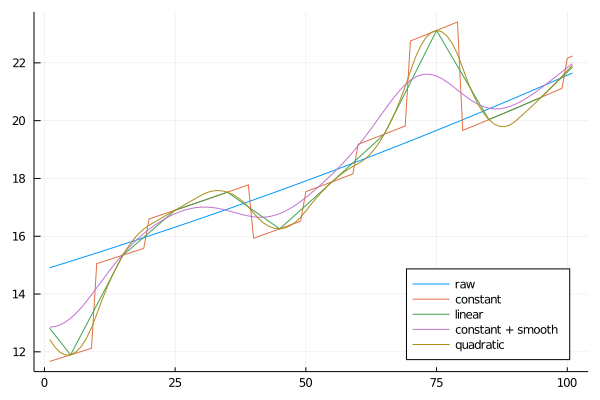

In [51]:
i = rand(1:length(cryo_noise_const))
s = testsignal1[500:600]
plot(s, label="raw")
plot!(addnoise!(copy(s), cryo_noise_const, i), label="constant")
plot!(addnoise!(copy(s), cryo_noise_linear, i), label="linear")
plot!(addnoise!(copy(s), cryo_noise_smooth, i), label="constant + smooth")
plot!(addnoise!(copy(s), cryo_noise_quadratic, i), label="quadratic")
plot!(legend=:bottomright)

In [61]:
getAnoised(noise, ns) = getA(moving_average(addnoise!(copy(testsignal1), noise), ns, 3)) - getA(moving_average(testsignal1, ns, 3))

getAnoised (generic function with 1 method)

In [62]:
Ahistconst50 = fit(Histogram, [getAnoised(cryo_noise_const, 50) for _ in 1:100_000], nbins=100)
Ahistlinear50 = fit(Histogram, [getAnoised(cryo_noise_linear, 50) for _ in 1:100_000], nbins=100)
Ahistsmooth50 = fit(Histogram, [getAnoised(cryo_noise_smooth, 50) for _ in 1:100_000], nbins=100)
Ahistquadratic50 = fit(Histogram, [getAnoised(cryo_noise_quadratic, 50) for _ in 1:100_000], nbins=100)

Histogram{Int64,1,Tuple{StepRangeLen{Float32,Float64,Float64}}}
edges:
  -0.072f0:0.002f0:0.08f0
weights: [2, 1, 1, 1, 4, 4, 7, 20, 11, 36  …  5, 2, 3, 1, 0, 1, 0, 0, 2, 1]
closed: left
isdensity: false

In [76]:
function getAnoisesubseq(ns)
    i = rand(1:length(raw) - 4000)
    getA(moving_average(raw[i:i+4000], ns, 3)) / 10
end

getAnoisesubseq (generic function with 1 method)

In [ ]:
noiseAs50 = [getAnoisesubseq(50) for _ in 1:1000_000]
# meannoiseAs50 = mean(noiseAs50)

In [107]:
Ahistnoise50 = fit(Histogram, noiseAs50, nbins=100)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.00115:5.0e-5:0.00395
weights: [56, 1, 0, 2, 1013, 1578, 1225, 4629, 8610, 8732  …  1780, 22, 1843, 15, 7, 8, 1852, 4, 3, 1]
closed: left
isdensity: false

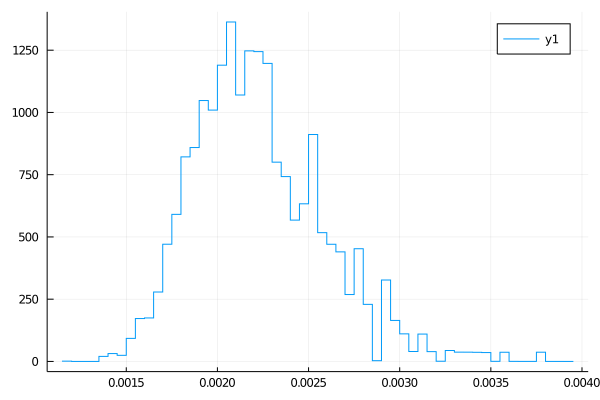

In [108]:
plot(normalize(Ahistnoise50), seriestype=:step)

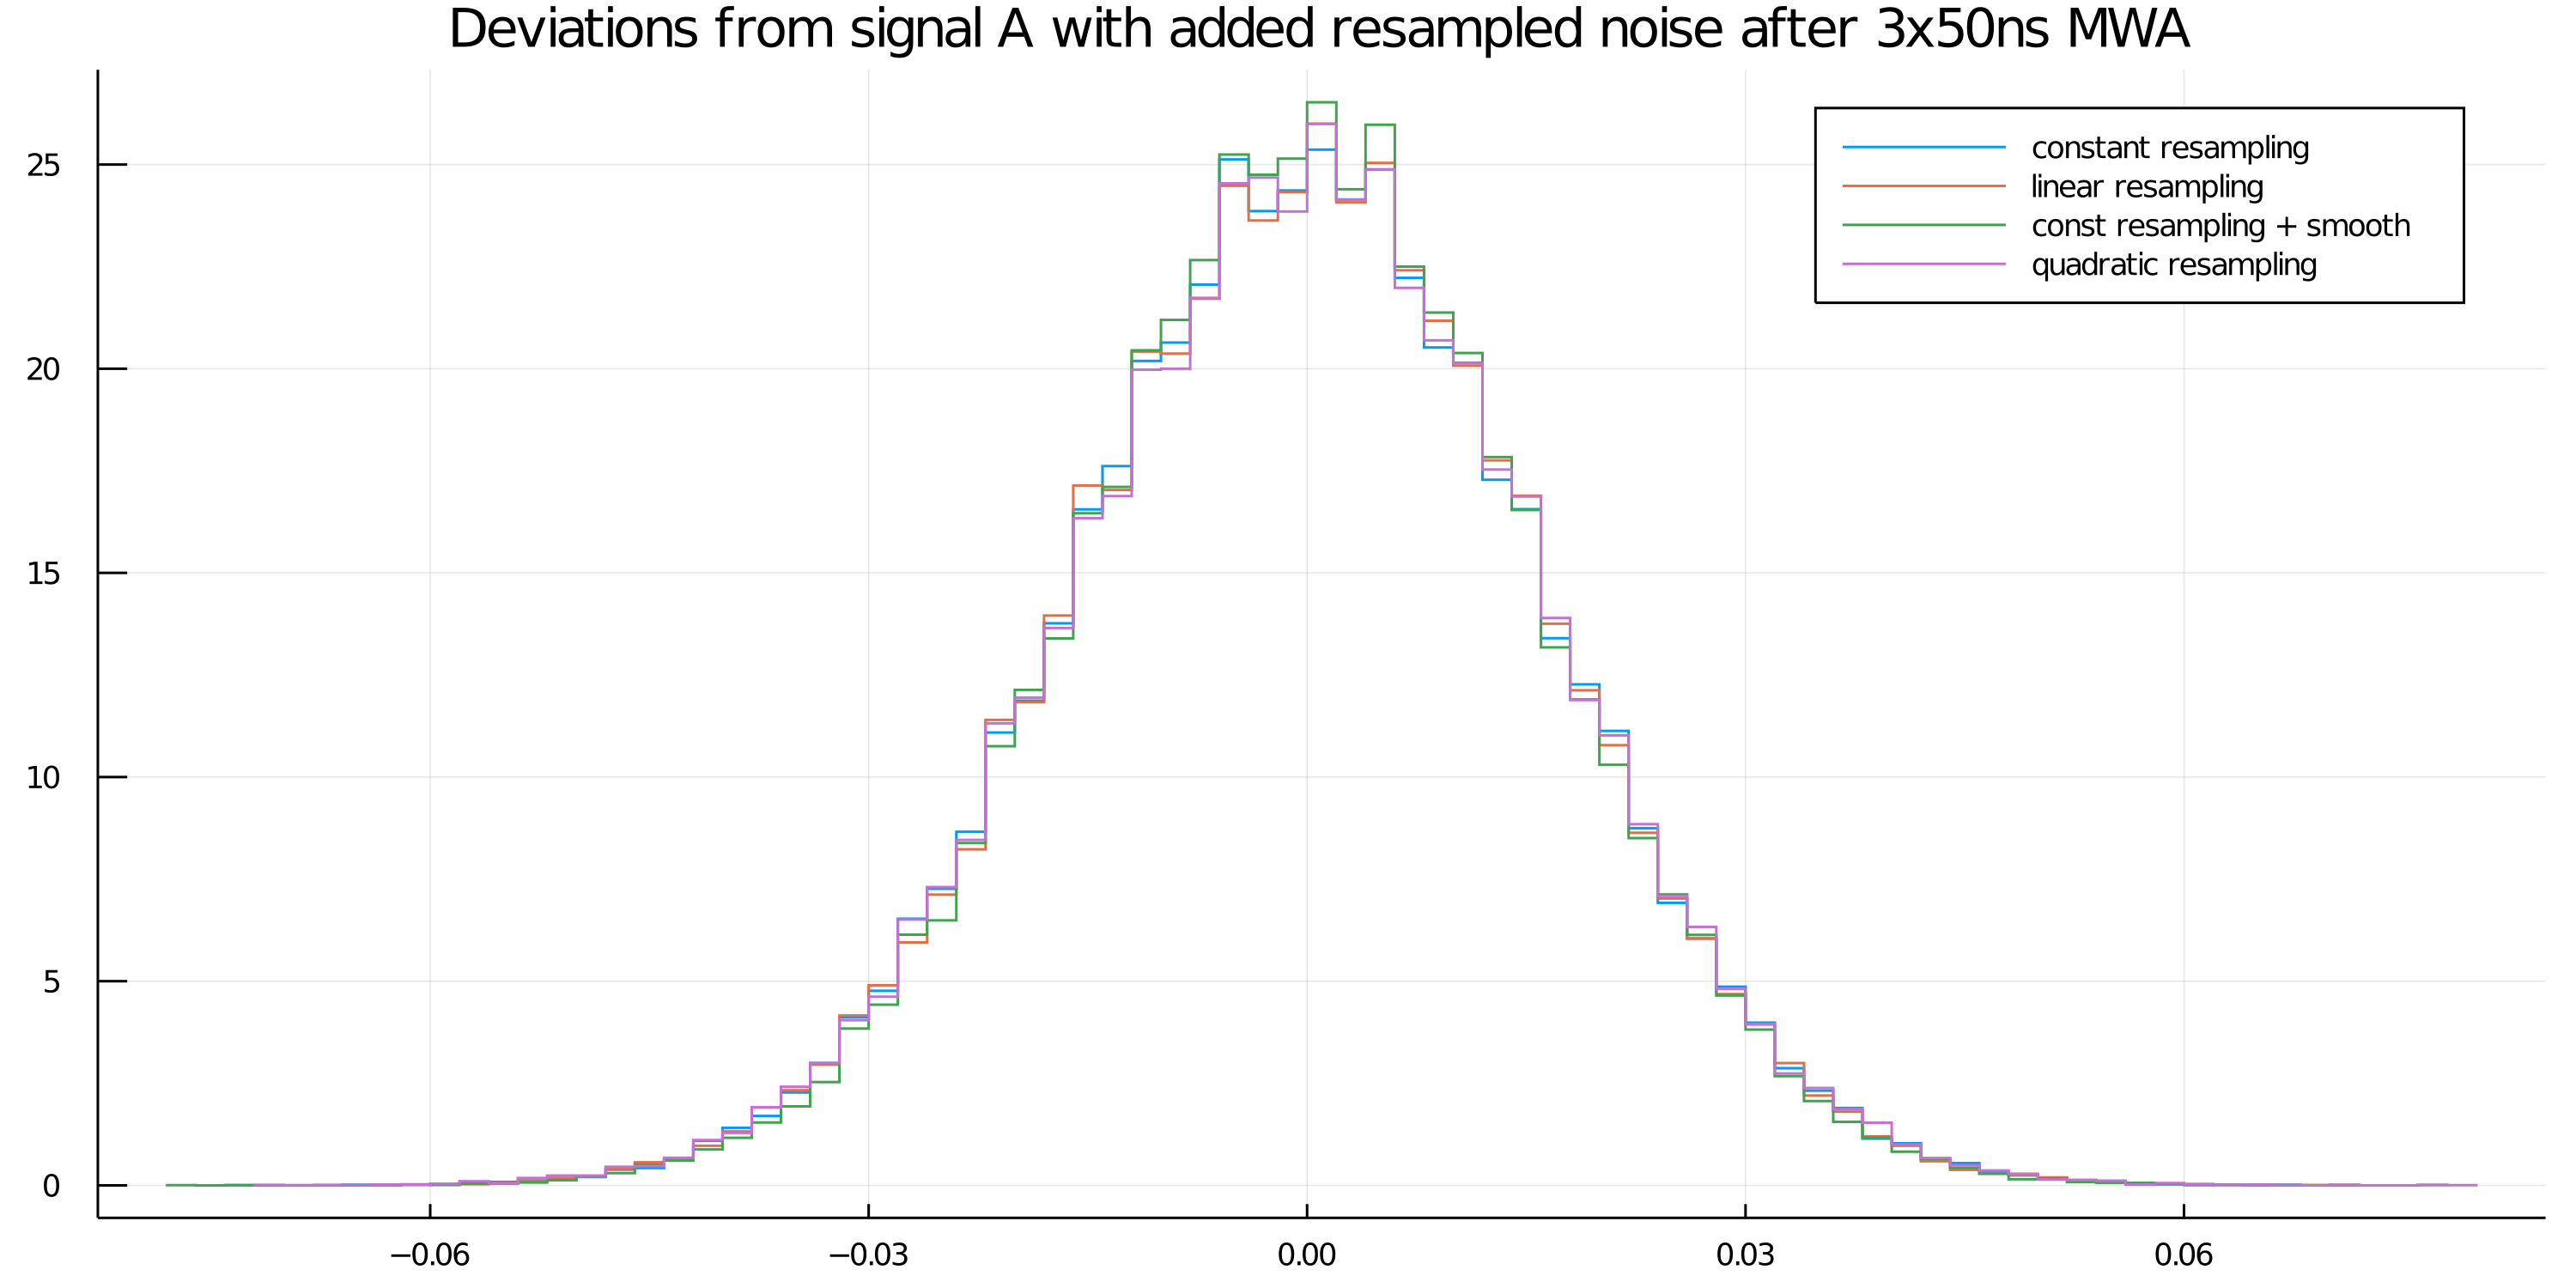

In [105]:
plot(title="Deviations from signal A with added resampled noise after 3x50ns MWA", fmt=:png, size=(1000, 500), dpi=300)
plot!(normalize(Ahistconst50), seriestype=:step, label="constant resampling")
plot!(normalize(Ahistlinear50), seriestype=:step, label="linear resampling")
plot!(normalize(Ahistsmooth50), seriestype=:step, label="const resampling + smooth")
plot!(normalize(Ahistquadratic50), seriestype=:step, label="quadratic resampling")

In [77]:
Ahistconst100 = fit(Histogram, [getAnoised(cryo_noise_const, 100) for _ in 1:100_000], nbins=100)
Ahistlinear100 = fit(Histogram, [getAnoised(cryo_noise_linear, 100) for _ in 1:100_000], nbins=100)
Ahistsmooth100 = fit(Histogram, [getAnoised(cryo_noise_smooth, 100) for _ in 1:100_000], nbins=100)
Ahistquadratic100 = fit(Histogram, [getAnoised(cryo_noise_quadratic, 100) for _ in 1:100_000], nbins=100)

Histogram{Int64,1,Tuple{StepRangeLen{Float32,Float64,Float64}}}
edges:
  -0.031f0:0.001f0:0.032f0
weights: [1, 0, 0, 0, 5, 11, 16, 34, 40, 84  …  30, 34, 17, 15, 7, 8, 1, 3, 0, 1]
closed: left
isdensity: false

In [113]:
noiseAs100 = [getAnoisesubseq(100) for _ in 1:1000_000]
# meannoiseAs100 = mean(noiseAs100)

1000000-element Array{Float64,1}:
 0.0006524336929890261
 0.0009041420564970849
 0.0006486971076964775
 0.0008520936012067033
 0.0008910230108923362
 0.0005044480649694036
 0.0007116138272638808
 0.0012374269715848124
 0.0008948318256311657
 0.0007980485554433106
 0.0007070403568144423
 0.0005020452772044259
 0.0006294323331564822
 ⋮
 0.0005832028167469056
 0.0007450762664447955
 0.0006996287145102018
 0.0008351543207279722
 0.0009118395522509412
 0.0005100617253883221
 0.0008892395733988492
 0.0007172844758058988
 0.0006155775926666579
 0.0007820458989792776
 0.001011683741424671
 0.0008575594808000436

In [114]:
Ahistnoise100 = fit(Histogram, noiseAs100, nbins=50)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.00034:2.0e-5:0.0014
weights: [341, 36, 1543, 306, 2193, 4524, 9102, 11550, 26153, 25794  …  12, 1739, 27, 1805, 1778, 16, 10, 4, 6, 1]
closed: left
isdensity: false

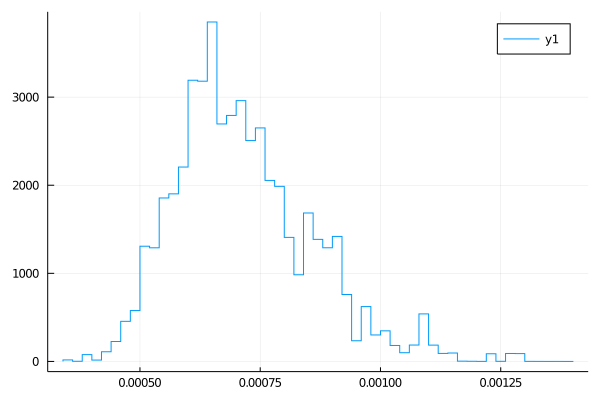

In [115]:
plot(normalize(Ahistnoise100), seriestype=:step)

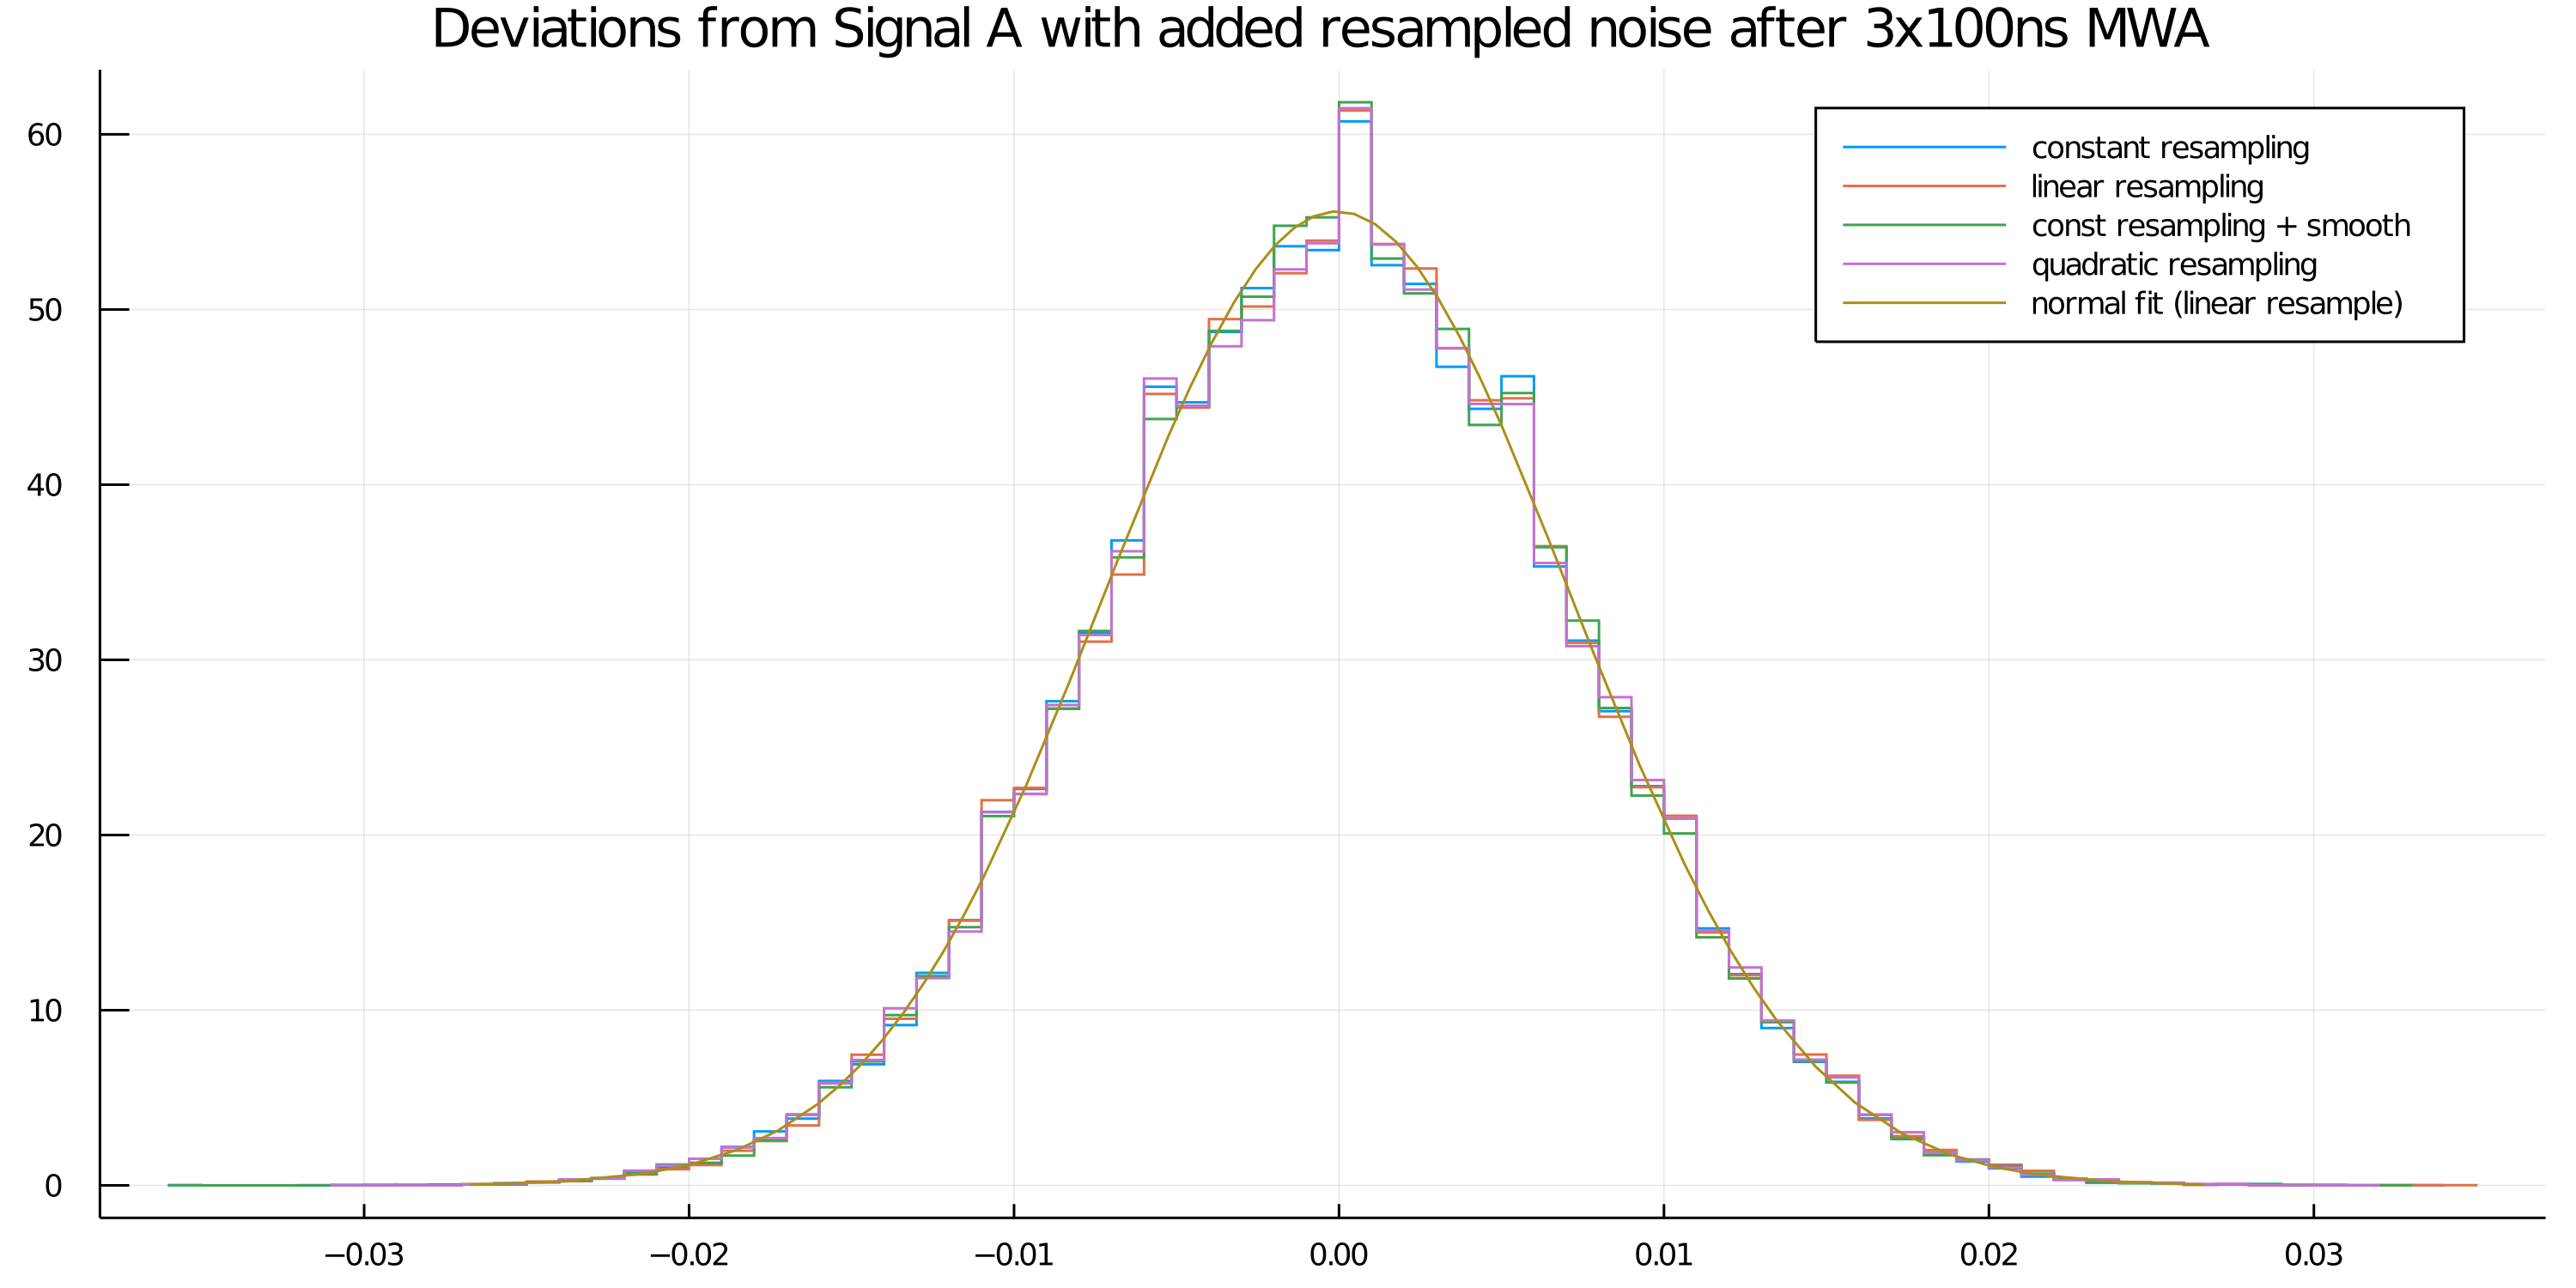

In [106]:
plot(title="Deviations from Signal A with added resampled noise after 3x100ns MWA", fmt=:png, size=(1000, 500), dpi=300)
plot!(normalize(Ahistconst100), seriestype=:step, label="constant resampling")
plot!(normalize(Ahistlinear100), seriestype=:step, label="linear resampling")
plot!(normalize(Ahistsmooth100), seriestype=:step, label="const resampling + smooth")
plot!(normalize(Ahistquadratic100), seriestype=:step, label="quadratic resampling")
plot!(fit(Normal, [getAnoised(cryo_noise_linear, 100) for _ in 1:10_000]), label="normal fit (linear resample)")

In [ ]:
savefig("resampling6.svg")